In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/ปี4/01046665 BIOSENSORS AND BIOELECTRONICS')

Mounted at /content/drive


In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
import random
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

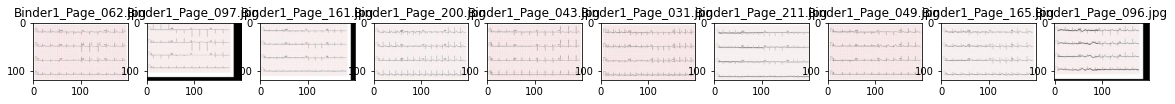

In [4]:
plt.figure(figsize=(20,20))
test_folder=r'Project Bio/data/ECG Data/Resize_CovidECG250'
for i in range(10):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,10,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [5]:
IMG_WIDTH=200
IMG_HEIGHT=120
img_folder=r'Project Bio/data/ECG Data/'

In [6]:
def create_dataset_PIL(test_folder):
    
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= np.array(Image.open(image_path))
            image= np.resize(image,(IMG_HEIGHT,IMG_WIDTH,3))
            image = image.astype(int)
            # image /= 255  
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array , class_name

In [7]:
PIL_img_data, class_name = create_dataset_PIL(img_folder)

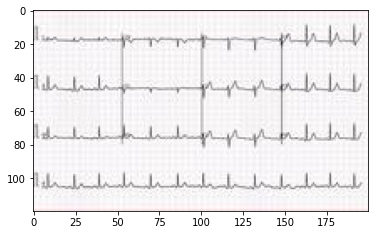

In [8]:
plt.imshow(PIL_img_data[0])

In [9]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'Resize_CovidECG250': 0, 'Resize_NormalECG250': 1}

In [10]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [11]:
print(target_val.count(0)) #Covid
print(target_val.count(1)) #Normal

250
250


In [15]:
target_val = np.asarray(target_val)
PIL_img_data = np.asarray(PIL_img_data)

In [16]:
len(PIL_img_data)

500

In [17]:
train_images,test_images,train_labels,test_labels = train_test_split(PIL_img_data,target_val,test_size=0.3,random_state=2)

In [ ]:
# (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# # Normalize pixel values to be between 0 and 1
# train_images, test_images = train_images / 255.0, test_images / 255.0

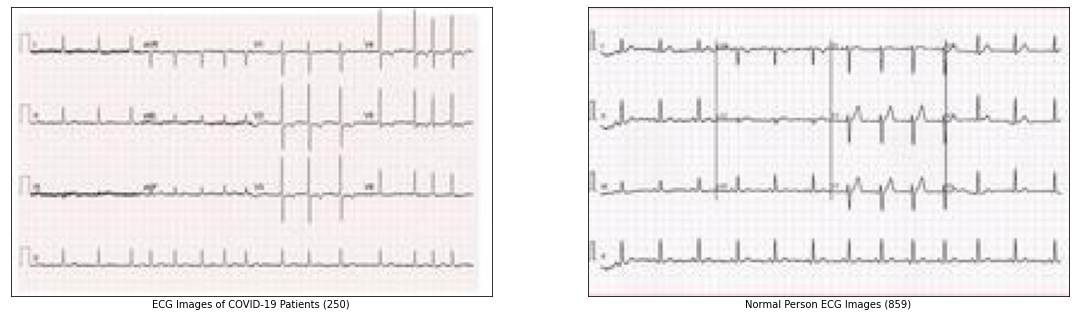

In [ ]:
class_names = ['ECG Images of COVID-19 Patients (250)','Normal Person ECG Images (859)']

plt.figure(figsize=(50,50))
for i in range(2):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
print(test_labels.shape)
print(test_images.shape)

(150,)
(150, 120, 200, 3)


In [ ]:
test_images[0][0][0]

array([254, 250, 249])

In [ ]:
num_classes = 2
model = models.Sequential([
  layers.Rescaling(1./255, input_shape=(120, 200, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 120, 200, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 120, 200, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 60, 100, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 60, 100, 32)       4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 30, 50, 64)       

In [ ]:
epochs=10
history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


11/11 [==============================] - 10s 880ms/step - loss: 0.7445 - accuracy: 0.4600 - val_loss: 0.6886 - val_accuracy: 0.5667
Epoch 2/10
11/11 [==============================] - 9s 852ms/step - loss: 0.6819 - accuracy: 0.5800 - val_loss: 0.6493 - val_accuracy: 0.6933
Epoch 3/10
11/11 [==============================] - 9s 851ms/step - loss: 0.6142 - accuracy: 0.6000 - val_loss: 0.5215 - val_accuracy: 0.6867
Epoch 4/10
11/11 [==============================] - 9s 851ms/step - loss: 0.4865 - accuracy: 0.7343 - val_loss: 0.3120 - val_accuracy: 0.9533
Epoch 5/10
11/11 [==============================] - 9s 859ms/step - loss: 0.3724 - accuracy: 0.8343 - val_loss: 0.1814 - val_accuracy: 0.9667
Epoch 6/10
11/11 [==============================] - 9s 859ms/step - loss: 0.1565 - accuracy: 0.9743 - val_loss: 0.1181 - val_accuracy: 0.9667
Epoch 7/10
11/11 [==============================] - 9s 863ms/step - loss: 0.1187 - accuracy: 0.9771 - val_loss: 0.1068 - val_accuracy: 0.9733
Epoch 8/10
11/11

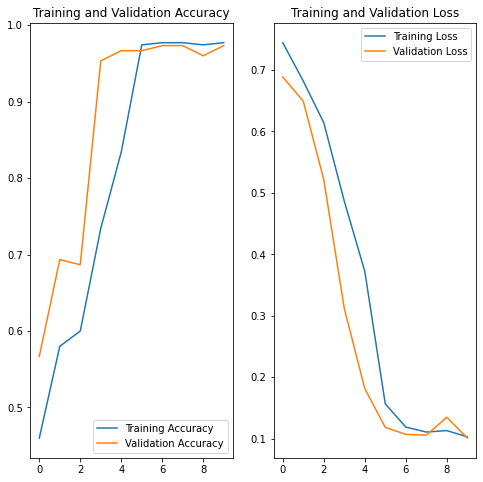

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predictions = model.predict(test_images)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to ECG Images of COVID-19 Patients (250) with a 73.10 percent confidence.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools 

target_names = ['Covid','Normal']

y_pred = np.argmax(predictions, axis=1)
print('Confusion Matrix')

cm = confusion_matrix(test_labels, y_pred)
# plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

print('Classification Report')
print(classification_report(test_labels, y_pred, target_names=target_names))

Confusion Matrix
Classification Report
              precision    recall  f1-score   support

       Covid       1.00      0.94      0.97        72
      Normal       0.95      1.00      0.97        78

    accuracy                           0.97       150
   macro avg       0.98      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [ ]:
cm

array([[67,  5],
       [ 0, 78]])

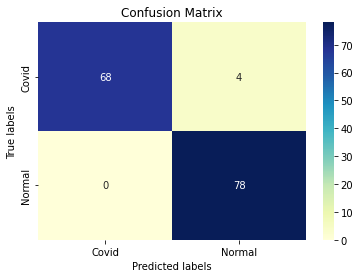

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt  
ax= plt.subplot()
sns.heatmap(cm, annot=True ,cmap='YlGnBu',fmt='d')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Covid', 'Normal']);
ax.yaxis.set_ticklabels(['Covid', 'Normal']);